In [1]:
import rasterio

In [2]:
import rasterio.plot

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import geopandas as gpd

In [5]:
ls 

20170830aC0970430w275230n_5_5.tif  label_map.pbtxt
20170831aC0945400w293900n_4_1.tif  labels.txt
ChipImages.ipynb                   model/
InspectNOAAData-backup.ipynb       model_old/
InspectNOAAData-scratch.ipynb      nohup.out
LICENSE                            notebook.log
README.md                          process_dssg-Copy1.ipynb
Untitled.ipynb                     process_dssg.ipynb
Untitled1.ipynb                    process_wv.py*
__pycache__/                       run.sh
aug_util.py                        test-NOAA-files.ipynb
classes.txt                        tfr_util.py
data_process_2020.ipynb            vanilla-ckpt/
dg_tomnod_viz-backup.ipynb         vanilla_ddd.config
dg_tomnod_viz.ipynb                wv_util.py
explore_tomnod_geojson.ipynb       xView Processing-Copy1.ipynb
getLabels.ipynb                    xview_class_labels.txt
harvey_train_t1.record


In [6]:
gdf = gpd.read_file(open('../dssg_data/bounding-boxes-shapefile/boundingboxes-all-damagearea-pixelcoords.geojson'))

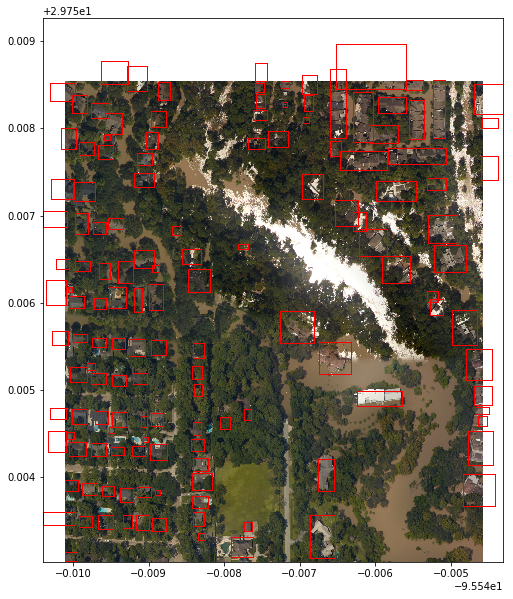

In [7]:
# plotting in geospatial coordinates
fig, ax = plt.subplots(figsize=(10,10))
with rasterio.open('../dssg_data/NOAA_big_tiles/extracted_tiles/all_tiles/20170831bC0953300w294630n_4_1.tif',"r") as r:
    extent=[r.bounds[0], r.bounds[2], r.bounds[1], r.bounds[3]]
    rasterio.plot.show(r.read(), extent=extent, ax=ax)
    xmin, xmax, ymin, ymax = extent
    gdf.cx[xmin:xmax, ymin:ymax].plot(ax=ax, color=None, facecolor="none", edgecolor='r')

In [8]:
ls ../dssg_data/selected_tiles/

0827/                              20170831aC0951330w300130n_4_1.tif
0828/                              20170831aC0951330w300130n_4_4.tif
0829/                              20170831aC0951330w300300n_1_1.tif
0830/                              20170831aC0951330w300300n_1_2.tif
0831/                              20170831aC0951330w300300n_1_3.tif
0901/                              20170831aC0951330w300300n_1_4.tif
0902/                              20170831aC0951330w300300n_1_5.tif
0903/                              20170831aC0951330w300300n_2_1.tif
20170831aC0945700w294500n_1_2.tif  20170831aC0951330w300300n_2_2.tif
20170831aC0945700w294500n_1_4.tif  20170831aC0951330w300300n_2_3.tif
20170831aC0945700w294500n_2_1.tif  20170831aC0951330w300300n_2_4.tif
20170831aC0945700w294500n_2_2.tif  20170831aC0951330w300300n_2_5.tif
20170831aC0945700w294500n_2_4.tif  20170831aC0951330w300300n_3_1.tif
20170831aC0945700w294500n_3_1.tif  20170831aC0951330w300300n_3_4.tif
20170831aC0945700w294500n_3_4.tif 

In [9]:
from ast import literal_eval

[[[ 486  488  495 ... 1012 1020 1021]
  [1300 1942 1446 ... 1737 1183 1102]]

 [[ 486  488  495 ... 1012 1020 1021]
  [1335 1969 1501 ... 1759 1234 1123]]

 [[ 545  566  542 ... 1034 1060 1060]
  [1335 1969 1501 ... 1759 1234 1123]]

 [[ 545  566  542 ... 1034 1060 1060]
  [1300 1942 1446 ... 1737 1183 1102]]

 [[ 486  488  495 ... 1012 1020 1021]
  [1300 1942 1446 ... 1737 1183 1102]]]
(5, 2, 278)


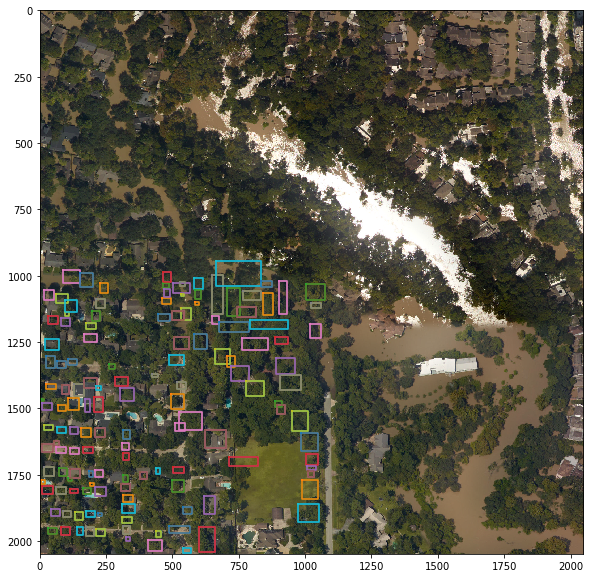

In [10]:
# plotting in image coordinates
fig, ax = plt.subplots(figsize=(10,10))
with rasterio.open('../dssg_data/NOAA_big_tiles/extracted_tiles/all_tiles/20170831bC0953300w294630n_4_1.tif', "r") as r:
    extent=[r.bounds[0], r.bounds[2], r.bounds[1], r.bounds[3]]
    xmin, xmax, ymin, ymax = extent
    gdf_clipped = gdf.cx[xmin:xmax, ymin:ymax]
    plt.imshow(np.moveaxis(r.read(), 0, 2))
    bb = np.array(gdf_clipped['bb'].apply(literal_eval).to_list())
    bb_xmin = bb[:,0]
    bb_ymin = bb[:,1]
    bb_xmax = bb[:,2]
    bb_ymax = bb[:,3]
    boxes = np.array([[bb_xmin, bb_ymin],[bb_xmin, bb_ymax],[bb_xmax, bb_ymax],[bb_xmax, bb_ymin],[bb_xmin, bb_ymin]])
    plt.plot(boxes[:,0,:], boxes[:,1,:])
    print(boxes)
    print(boxes.shape)

In [11]:
# the range of the boxes is about 1000 so most probably they match images which are 1000
max(gdf["bb"])

'(999, 996, 1041, 1019)'

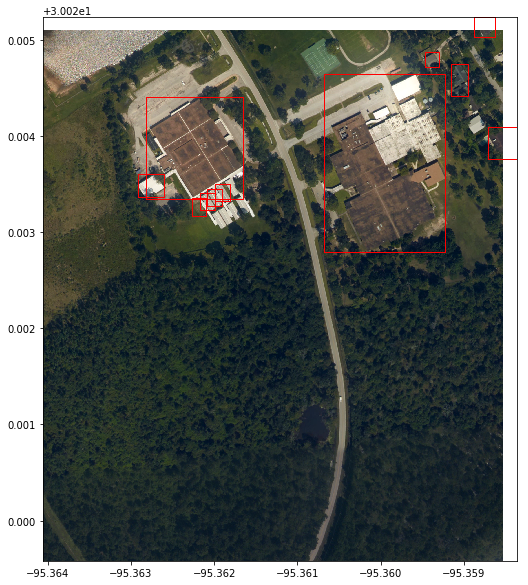

In [12]:
# test with selected tiles
fig, ax = plt.subplots(figsize=(10,10))
with rasterio.open('../dssg_data/selected_tiles/20170831aC0952230w300130n_1_3.tif',"r") as r:
    extent=[r.bounds[0], r.bounds[2], r.bounds[1], r.bounds[3]]
    rasterio.plot.show(r.read(), extent=extent, ax=ax)
    xmin, xmax, ymin, ymax = extent
    gdf.cx[xmin:xmax, ymin:ymax].plot(ax=ax, color=None, facecolor="none", edgecolor='r')

[[[ 962  213  229  332  351  366  385  626  851  911  962  992]
  [ 517  276  129  324  314  306  296   83   42   65  517  186]]

 [[ 962  213  229  332  351  366  385  626  851  911  962  992]
  [ 555  322  325  358  347  340  330  427   71  126  555  248]]

 [[1009  269  447  365  384  399  417  897  884  947 1009 1058]
  [ 555  322  325  358  347  340  330  427   71  126  555  248]]

 [[1009  269  447  365  384  399  417  897  884  947 1009 1058]
  [ 517  276  129  324  314  306  296   83   42   65  517  186]]

 [[ 962  213  229  332  351  366  385  626  851  911  962  992]
  [ 517  276  129  324  314  306  296   83   42   65  517  186]]]
(5, 2, 12)


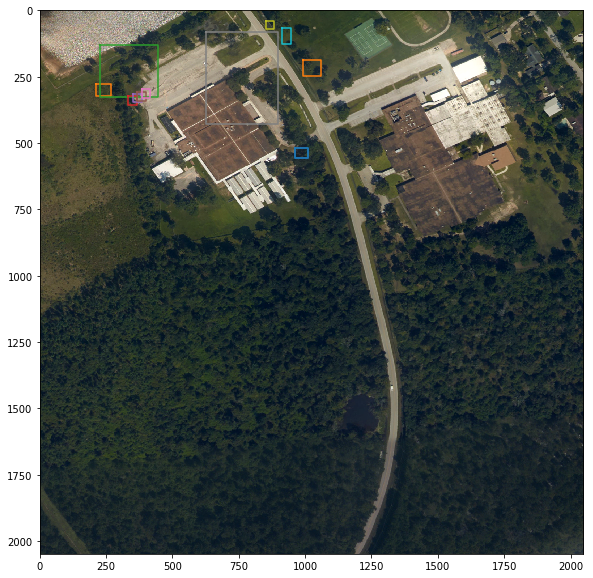

In [13]:
# plotting in image coordinates
fig, ax = plt.subplots(figsize=(10,10))
with rasterio.open('../dssg_data/selected_tiles/20170831aC0952230w300130n_1_3.tif', "r") as r:
    extent=[r.bounds[0], r.bounds[2], r.bounds[1], r.bounds[3]]
    xmin, xmax, ymin, ymax = extent
    gdf_clipped = gdf.cx[xmin:xmax, ymin:ymax]
    plt.imshow(np.moveaxis(r.read(), 0, 2))
    bb = np.array(gdf_clipped['bb'].apply(literal_eval).to_list())
    bb_xmin = bb[:,0]
    bb_ymin = bb[:,1]
    bb_xmax = bb[:,2]
    bb_ymax = bb[:,3]
    boxes = np.array([[bb_xmin, bb_ymin],[bb_xmin, bb_ymax],[bb_xmax, bb_ymax],[bb_xmax, bb_ymin],[bb_xmin, bb_ymin]])
    plt.plot(boxes[:,0,:], boxes[:,1,:])
    print(boxes)
    print(boxes.shape)